In this notebook, we analyse the characteristics of the biased cluster.
We would like to know the following:
- What are the most common values for each feature?
- How can we visualize the essential components of this cluster?
- What is the distribution of the classes in this cluster? Is the classifier underperforming on one class?
- What type of misclassifications is most present in this cluster?

In [16]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
def accuracy(results):
    correct = results.loc[results['errors'] == 0]
    # print('Correct:', len(correct), ' -  Total:', len(results))
    acc = len(correct)/len(results)
    # print('Accuracy:', acc)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    return accuracy(remaining_clusters) - accuracy(cluster_x)

In [17]:
biased_clusters = pd.read_csv(r'../Clustered_datasets/biased_credit_clusters.csv', index_col=0)
# biased_clusters = biased_clusters.drop(['new_clusters'])
biased_clusters.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,true_class,predicted_class,errors,clusters,new_clusters
136,-0.736682,0.222911,2.097685,0.541581,1.659987,-0.077152,-0.250785,-0.547723,-0.620682,-0.109435,...,1.249242,-0.250785,1.249242,-0.761209,-0.191859,0.0,0,0.0,7,-1
76,-0.098692,0.222911,0.299478,1.760861,-0.602414,-0.077152,-0.250785,-0.547723,1.611131,-0.109435,...,-0.800485,-0.250785,1.249242,-0.761209,-0.191859,1.0,0,1.0,9,-1
280,-1.101248,0.222911,0.068512,-0.433842,1.659987,-0.077152,-0.250785,-0.547723,-0.620682,-0.109435,...,1.249242,-0.250785,-0.800485,-0.761209,-0.191859,0.0,0,0.0,1,-1
319,-0.736682,-1.346756,0.174903,-0.433842,-0.602414,-0.077152,-0.250785,1.825742,-0.620682,-0.109435,...,-0.800485,-0.250785,1.249242,-0.761209,-0.191859,0.0,0,0.0,7,-1
174,-0.827824,0.222911,0.086308,0.053870,-0.602414,-0.077152,3.987480,-0.547723,-0.620682,-0.109435,...,-0.800485,-0.250785,1.249242,-0.761209,-0.191859,1.0,0,1.0,5,-1


In [18]:
n_clusters = len(biased_clusters['clusters'].unique())
highest_bias = -999
highest_bias_cluster_n = -1

for i in range(0, n_clusters):
    neg_bias_i = bias_acc(biased_clusters, i, 'clusters')
    if neg_bias_i > highest_bias:
        highest_bias = neg_bias_i
        highest_bias_cluster_n = i

print('Highest bias found: ', highest_bias)
print('Highest biased cluster: ', highest_bias_cluster_n)


Highest bias found:  0.5299823633156966
Highest biased cluster:  5


In [19]:
bias_index = biased_clusters[biased_clusters['clusters']== highest_bias_cluster_n].index

# TODO plot:
- Plot to show difference between biased cluster and other clusters/datapoints (in different colours)
- Going back to the unscaled values in the original dataset by taking the indices of the biased clusters


In [31]:
original_preprocessed = pd.read_csv(r'../Preprocessed_datasets/preprocessed_german_credit.csv', index_col=0)
original_preprocessed["analysis_plot"] = "remain"
#original_preprocessed[original_preprocessed.index in bias_index, "analysis_plot"] = "biased"

cluster = original_preprocessed.loc[bias_index]
cluster["analysis_plot"] = "biased"
original_preprocessed["analysis_plot"] = cluster["analysis_plot"].combine_first(original_preprocessed['analysis_plot'])
original_preprocessed.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,predicted_class,true_class,errors,analysis_plot
136,27,2,8613,27,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.0,0.0,remain
76,34,2,3965,42,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1.0,1.0,remain
280,23,2,3368,15,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,0.0,remain
319,27,1,3643,15,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.0,0.0,remain
174,26,2,3414,21,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1.0,1.0,biased


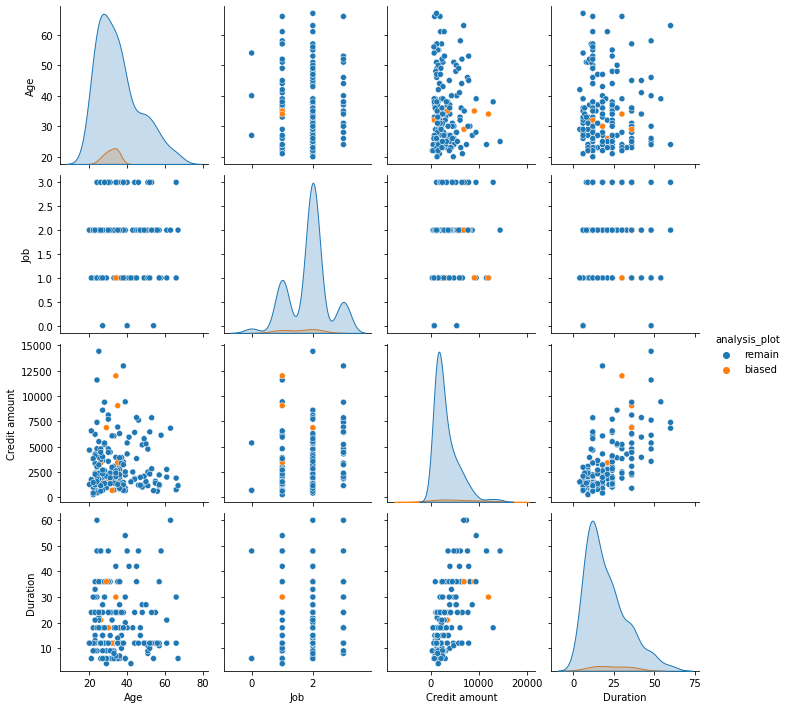

In [35]:
# TODO retrieve attributes from the dataset before one-hot encodings
X = original_preprocessed[['Age', 'Job', 'Credit amount', 'Duration', 'analysis_plot']]
sns.pairplot(X, hue="analysis_plot")
